# Deep Learning Lab Exercises

## Exercise 1: Understanding MLPs and Network Architecture

1. Complete the code to train each architecture for 50 epochs
2. Record training and validation accuracy for each
3. Plot the learning curves
4. Explain which architecture performed best and why


In [5]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 23.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 61.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 58.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 50.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1
  Consider ad

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training model with architecture: [10, 3]

Training model with architecture: [20, 10, 3]

Training model with architecture: [30, 20, 10, 3]


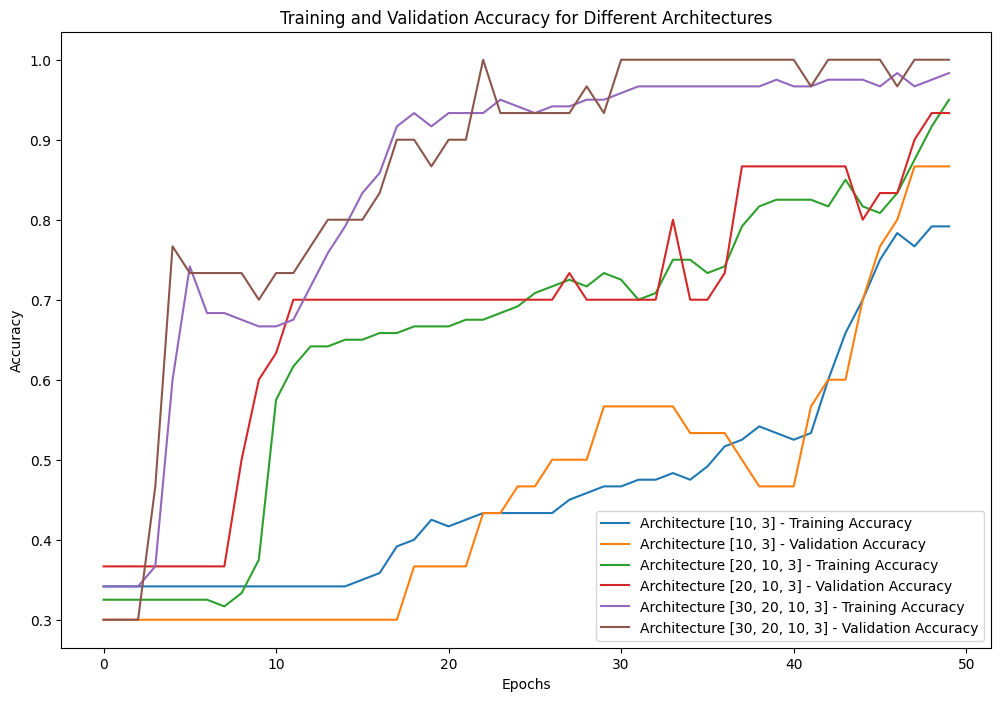

Architecture [10, 3] - Max Validation Accuracy: 0.8667
Architecture [20, 10, 3] - Max Validation Accuracy: 0.9333
Architecture [30, 20, 10, 3] - Max Validation Accuracy: 1.0000

Best Architecture: Architecture [30, 20, 10, 3] with Validation Accuracy: 1.0000


In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Load and prepare data
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create and evaluate model
def create_model(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='relu', input_shape=(4,)))
    for size in layer_sizes[1:-1]:
        model.add(Dense(size, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# Try different architectures
architectures = [
    [10, 3],
    [20, 10, 3],
    [30, 20, 10, 3]
]

# Train each architecture and record accuracy
history_dict = {}  # To store training histories
for i, arch in enumerate(architectures):
    model = create_model(arch)
    print(f"\nTraining model with architecture: {arch}")
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
    history_dict[f'Architecture {arch}'] = history  # Save history for later plotting

# Plot learning curves for each architecture
plt.figure(figsize=(12, 8))
for arch, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f'{arch} - Training Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{arch} - Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Different Architectures')
plt.legend()
plt.show()

# Evaluate the best model
best_architecture = None
best_val_accuracy = 0
for arch, history in history_dict.items():
    max_val_accuracy = max(history.history['val_accuracy'])
    print(f"{arch} - Max Validation Accuracy: {max_val_accuracy:.4f}")
    if max_val_accuracy > best_val_accuracy:
        best_val_accuracy = max_val_accuracy
        best_architecture = arch

print(f"\nBest Architecture: {best_architecture} with Validation Accuracy: {best_val_accuracy:.4f}")


## Exercise 2: Impact of Batch Size and Learning Rate
Using the best architecture from Exercise 1, explore how batch size and learning rate affect training:

Tasks:
1. Create a grid of experiments testing different batch sizes and learning rates
2. Plot training curves for each combination
3. Analyze how these parameters affect:
   - Training speed
   - Final accuracy
   - Stability of training

In [9]:

# Test different combinations
batch_sizes = [8, 32, 64]
learning_rates = [0.1, 0.01, 0.001]

from tensorflow.keras.optimizers import Adam

def train_model(batch_size, lr):
    model = create_model([20, 10, 3])  # Use best architecture from Ex 1
    model.compile(optimizer=Adam(learning_rate=lr),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
    history = model.fit(X_train, y_train,
                       batch_size=batch_size,
                       epochs=50,
                       validation_split=0.2,
                       verbose=0)
    return history


Training with batch size: 8, learning rate: 0.1
Training with batch size: 8, learning rate: 0.01
Training with batch size: 8, learning rate: 0.001
Training with batch size: 32, learning rate: 0.1
Training with batch size: 32, learning rate: 0.01
Training with batch size: 32, learning rate: 0.001
Training with batch size: 64, learning rate: 0.1
Training with batch size: 64, learning rate: 0.01
Training with batch size: 64, learning rate: 0.001


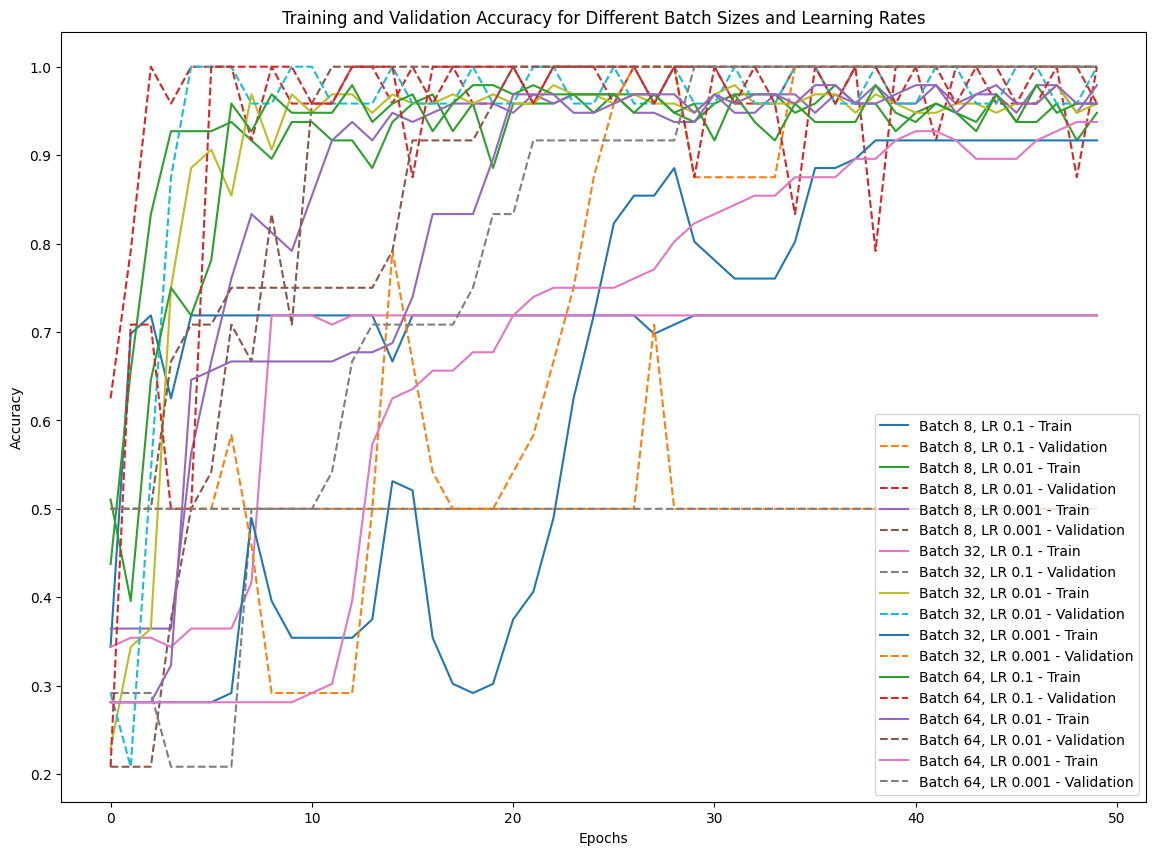

Batch 8, LR 0.1 - Final Training Accuracy: 0.7188, Final Validation Accuracy: 0.5000
Batch 8, LR 0.01 - Final Training Accuracy: 0.9479, Final Validation Accuracy: 1.0000
Batch 8, LR 0.001 - Final Training Accuracy: 0.9792, Final Validation Accuracy: 1.0000
Batch 32, LR 0.1 - Final Training Accuracy: 0.7188, Final Validation Accuracy: 0.5000
Batch 32, LR 0.01 - Final Training Accuracy: 0.9583, Final Validation Accuracy: 1.0000
Batch 32, LR 0.001 - Final Training Accuracy: 0.9167, Final Validation Accuracy: 1.0000
Batch 64, LR 0.1 - Final Training Accuracy: 0.9583, Final Validation Accuracy: 0.9583
Batch 64, LR 0.01 - Final Training Accuracy: 0.9583, Final Validation Accuracy: 1.0000
Batch 64, LR 0.001 - Final Training Accuracy: 0.9375, Final Validation Accuracy: 1.0000


In [10]:

# Dictionary to store results for plotting
experiment_results = {}

# Train and record histories for each combination of batch size and learning rate
for batch_size in batch_sizes:
    for lr in learning_rates:
        print(f"Training with batch size: {batch_size}, learning rate: {lr}")
        history = train_model(batch_size, lr)
        experiment_results[f"Batch {batch_size}, LR {lr}"] = history

# Plot training curves for each combination
plt.figure(figsize=(14, 10))
for label, history in experiment_results.items():
    plt.plot(history.history['accuracy'], label=f"{label} - Train")
    plt.plot(history.history['val_accuracy'], linestyle="--", label=f"{label} - Validation")

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Different Batch Sizes and Learning Rates')
plt.legend()
plt.show()

# Analyze results
for label, history in experiment_results.items():
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    print(f"{label} - Final Training Accuracy: {final_train_acc:.4f}, Final Validation Accuracy: {final_val_acc:.4f}")



## Exercise 3: Comparing MLPs with Traditional Models

1. Complete the MLP comparison code
2. Run comparisons on both datasets
3. Explain why each model performs better or worse on each dataset


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Dataset 1: Wisconsin Breast Cancer dataset (good for traditional ML)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_c, y_c = cancer.data, cancer.target

# Dataset 2: Fashion MNIST subset (good for neural networks)
# Only use 1000 samples to keep training time reasonable
from tensorflow.keras.datasets import fashion_mnist
(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()
X_f = X_train_full[:1000].reshape(1000, -1) / 255.0
y_f = y_train_full[:1000]

# Function to compare models
def compare_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Random Forest
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train_scaled, y_train)
    rf_score = rf.score(X_test_scaled, y_test)
    
    # MLP
    mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=100, random_state=42)
    mlp.fit(X_train_scaled, y_train)
    mlp_score = mlp.score(X_test_scaled, y_test)
    
    return rf_score, mlp_score

# Run comparisons on both datasets
rf_score_c, mlp_score_c = compare_models(X_c, y_c)
rf_score_f, mlp_score_f = compare_models(X_f, y_f)

print("Breast Cancer Dataset - Random Forest Accuracy:", rf_score_c)
print("Breast Cancer Dataset - MLP Accuracy:", mlp_score_c)
print("\nFashion MNIST Dataset - Random Forest Accuracy:", rf_score_f)
print("Fashion MNIST Dataset - MLP Accuracy:", mlp_score_f)



/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Breast Cancer Dataset - Random Forest Accuracy: 0.9649122807017544
Breast Cancer Dataset - MLP Accuracy: 0.956140350877193

Fashion MNIST Dataset - Random Forest Accuracy: 0.81
Fashion MNIST Dataset - MLP Accuracy: 0.78


/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



## Exercise 4: Early Stopping and Overfitting (15 minutes)

1. Train the model without early stopping for 200 epochs
2. Implement early stopping with appropriate parameters
3. Compare training curves and final test performance
4. Visualize decision boundaries for both models


In [ ]:

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import make_moons

# Generate a small noisy dataset prone to overfitting
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an intentionally complex model
def create_complex_model():
    model = Sequential([
        Dense(100, activation='relu', input_shape=(2,)),
        Dense(100, activation='relu'),
        Dense(100, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
